# How to apply Gradient Boosting Classifier to soybean dataset

The soybean dataset has 14 types of leafs. Each one class have minimum 10 types of images and some have 50 images. the total images are 375 images. in the test folder we have 41 images. with this we have to train 375 images with class labels and test on 41 images, predict each image class label.

### https://www.youtube.com/watch?v=lBeAYlzvUk4

In [5]:
!pip install pmlb

     |████████████████████████████████| 596 kB 4.8 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [6]:
# imports
from pmlb import fetch_data
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential
import tensorflow.keras.layers as Layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical

### *Loading Dataset*

In [8]:
# loading dataset
dataset_name = 'soybean'
dataset = fetch_data(dataset_name)
print(dataset.head())

print("\n", dataset.columns)

cols = ['date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist',
       'area-damaged', 'severity', 'seed-tmt', 'germination', 'plant-growth',
       'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size',
       'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem', 'lodging',
       'stem-cankers', 'canker-lesion', 'fruiting-bodies', 'external-decay',
       'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods', 'fruit-spots',
       'seed', 'mold-growth', 'seed-discolor', 'seed-size', 'shriveling',
       'roots', 'target']

print(dataset[cols].info())
print(dataset[cols].describe())
print(dataset[cols].corr())

   date  plant-stand  precip  temp  ...  seed-size  shriveling  roots  target
0     6            2       1     3  ...          2           1      2      10
1     2            2       1     3  ...          2           1      2      10
2     3            2       1     3  ...          2           1      2      10
3     3            2       1     3  ...          2           1      2      10
4     6            2       1     3  ...          2           1      2      10

[5 rows x 36 columns]

 Index(['date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist',
       'area-damaged', 'severity', 'seed-tmt', 'germination', 'plant-growth',
       'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size',
       'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem', 'lodging',
       'stem-cankers', 'canker-lesion', 'fruiting-bodies', 'external-decay',
       'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods', 'fruit-spots',
       'seed', 'mold-growth', 'seed-discolor', 'seed-size', 'shriveli

### *Handling and Spliting Data*

In [9]:
# loading features and targets from dataset
X, y = fetch_data(dataset_name, return_X_y=True)

# split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scores1 = [] ; scores2 = [] ; scores3 = [] ; 

### *Creating Model*

In [10]:
# Applying Gradient Boosting
dtree = GradientBoostingClassifier(random_state=42, max_depth=4, n_estimators=50, verbose=1)
dtree.fit(X_train, y_train)
scores1.append(dtree.score(X_test, y_test))

dtree = GradientBoostingClassifier(random_state=42, max_depth=8, n_estimators=100, verbose=1)
dtree.fit(X_train, y_train)
scores2.append(dtree.score(X_test, y_test))

dtree = GradientBoostingClassifier(random_state=42, max_depth=12, n_estimators=200, verbose=1)
dtree.fit(X_train, y_train)
scores3.append(dtree.score(X_test, y_test))

      Iter       Train Loss   Remaining Time 
         1           1.2581            4.46s
         2           1.0174            3.49s
         3           0.8488            3.30s
         4           0.7217            3.77s
         5           0.6223            3.63s
         6           0.5401            3.94s
         7           0.4731            3.63s
         8           0.4142            3.69s
         9           0.3661            3.66s
        10           0.3258            3.71s
        20           0.1261            2.62s
        30           0.0593            1.70s
        40           0.0332            0.81s
        50           0.0192            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1997            5.98s
         2           0.9356            5.71s
         3           0.7525            5.84s
         4           0.6154            6.00s
         5           0.5080            6.42s
         6           0.4228            6.42s
        

### *Plotting Data*

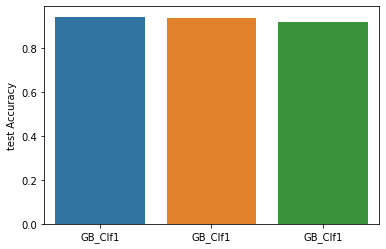

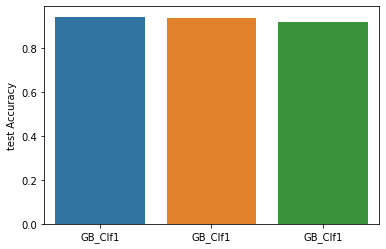

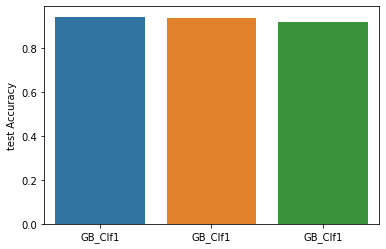

In [11]:
# plotting data
sns.barplot(data=[scores1, scores2, scores3])
plt.xticks([0, 1, 2], ['GB_Clf1', 'GB_Clf1', 'GB_Clf1'])
plt.ylabel('test Accuracy') ; plt.show()

sns.barplot(data=[scores1, scores2, scores3])
plt.xticks([0, 1, 2], ['GB_Clf1', 'GB_Clf1', 'GB_Clf1'])
plt.ylabel('test Accuracy') ; plt.show()

sns.barplot(data=[scores1, scores2, scores3])
plt.xticks([0, 1, 2], ['GB_Clf1', 'GB_Clf1', 'GB_Clf1'])
plt.ylabel('test Accuracy') ; plt.show()